# XGBoost

https://xgboost.readthedocs.io/en/stable/index.html

**핵심 파라미터**
1. **learning_rate**: 각 트리의 기여도를 조절하는 학습률로, 값이 작을수록 모델의 복잡도가 낮아지지만 더 많은 트리를 필요로 한다.
2. **n_estimators**: 트리의 개수를 의미하며, 많을수록 복잡한 모델이 된다.
3. **max_depth**: 각 트리의 최대 깊이로, 트리가 너무 깊으면 과적합될 수 있다.
4. **objective**: 손실 함수의 종류로, 회귀 문제의 경우 'reg:squarederror', 분류 문제의 경우 'binary:logistic' 등을 사용한다.

!pip install xgboost

In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/56.8 MB 8.4 MB/s eta 0:00:07
   -- ------------------------------------- 3.4/56.8 MB 8.4 MB/s eta 0:00:07
   --- ------------------------------------ 4.5/56.8 MB 7.4 MB/s eta 0:00:08
   ---- ----------------------------------- 6.0/56.8 MB 7.2 MB/s eta 0:00:08
   ---- ----------------------------------- 6.8/56.8 MB 6.8 MB/s eta 0:00:08
   ----- ---------------------------------- 7.9/56.8 MB 6.2 MB/s eta 0:00:08
   ------ --------------------------------- 8.9/56.8 MB 6.0 MB/s eta 0:00:08
   ------- -------------------------------- 10.0/56.8 MB 5.9 MB/s eta 0:00:09
   ------- -------------------------------- 10.7/56.8 MB 5.6 MB/s eta 0:00:09
   -------- ------------------------------- 11.8/56.8 MB 5.5 MB/s eta 0:00:09
   -------- ------------------------------- 12.3/56.8 MB 5.3 MB/s eta 0:00:09
   --------- ------------------------------ 13.1/56.8 MB 5.2 MB/s eta 0:00:09
 

In [29]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# iris_data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)
# data = load_breast_cancer()
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)


# sklearn에서 제공하는 데이터셋을 사용하는 경우
X, y = load_breast_cancer(return_X_y=True, as_frame=True) # sklearn에서 제공하는 데이터셋을 사용하는 경우
# X(feature)와 y(target)을 분리해서 as_frame=True로 설정하면 DataFrame 형태로 반환된다. 본래는 ndarray 형태로 반환된다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



xgb_clf = XGBClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=3,
        objective='binary:logistic',
        random_state=0
        )

xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"학습 데이터 정확도: {accuracy_train}")
print(f"평가 데이터 정확도: {accuracy_test}")
print(f"분류 보고서: \n{classification_report(y_test, y_pred_test)}")
print(f"혼동 행렬: \n{confusion_matrix(y_test, y_pred_test)}") # → 오차행렬 (confusion matrix)

# percision = 52 / (52 + 1)
# recall = 52 / (52 + 1)
# f1_score = 2 * (percision * recall) / (percision + recall)


학습 데이터 정확도: 1.0
평가 데이터 정확도: 0.986013986013986
분류 보고서: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

혼동 행렬: 
[[52  1]
 [ 1 89]]


In [13]:
(52 + 89) / (52 + 89 + 1 + 1)

0.986013986013986

$$ percision = \frac{TP}{TP + FP} $$
$$ recall = \frac{TP}{TP + NF} $$
$$ percision 과  recall은 둘은 상관관계를 갖고 있다. $$

In [ ]:
xgb_clf =XGBClassifier(
    n_estimators=500,             # 트리의 개수
    learning_rate=0.1,            # 학습률
    max_depth=3,                  # 트리의 최대 깊이
    random_state=0,               # 랜덤 시드
    early_stopping_rounds=10,     # 조기 중단 반복 횟수 → 평가지표를 통해 조기 중단을 결정
    eval_metric='logloss'         # 로그 손실 함수 → 이진분류에 많이 활용되는 손실함수
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0) # 학습데이터를 다시 나누어 검증데이터 생성
eval_set = [(X_tr, y_tr), (X_val, y_val)] # eval_set에 학습데이터(train set)와 검증데이터(validation set)를 넣어준다.
# logloss를 통해서 학습되는 과정을 확인
xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True) # eval_set : 검증데이터, verbose : 학습과정 logloss 출력

# 우리는 500개 트리를 학습하라고 n_estimators=500을 줬지만, 조기 중단 반복 횟수를 10으로 줬기 때문에 500개 트리를 학습하지 않아도 된다.

[0]	validation_0-logloss:0.57452	validation_1-logloss:0.60880
[1]	validation_0-logloss:0.50928	validation_1-logloss:0.55472
[2]	validation_0-logloss:0.45694	validation_1-logloss:0.50527
[3]	validation_0-logloss:0.40953	validation_1-logloss:0.46292
[4]	validation_0-logloss:0.36927	validation_1-logloss:0.42700
[5]	validation_0-logloss:0.33481	validation_1-logloss:0.39919
[6]	validation_0-logloss:0.30438	validation_1-logloss:0.37171
[7]	validation_0-logloss:0.27723	validation_1-logloss:0.34853
[8]	validation_0-logloss:0.25387	validation_1-logloss:0.32843
[9]	validation_0-logloss:0.23308	validation_1-logloss:0.30965
[10]	validation_0-logloss:0.21360	validation_1-logloss:0.29418
[11]	validation_0-logloss:0.19725	validation_1-logloss:0.28057
[12]	validation_0-logloss:0.18229	validation_1-logloss:0.26975
[13]	validation_0-logloss:0.16936	validation_1-logloss:0.25935
[14]	validation_0-logloss:0.15736	validation_1-logloss:0.24851
[15]	validation_0-logloss:0.14565	validation_1-logloss:0.23954
[1

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'logloss'


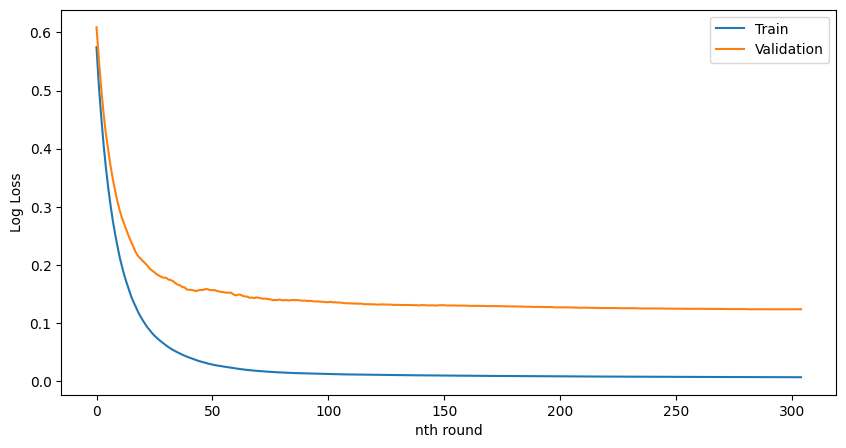

In [22]:
# 훈련과정시각화
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()

train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.xlabel('nth round')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

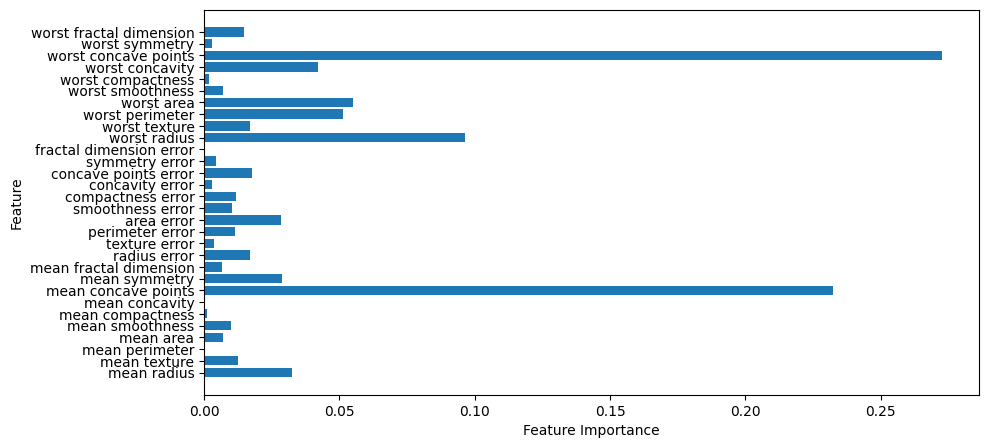

In [23]:
feature_importances = xgb_clf.feature_importances_

plt.figure(figsize=(10, 5))
plt.barh(data.feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


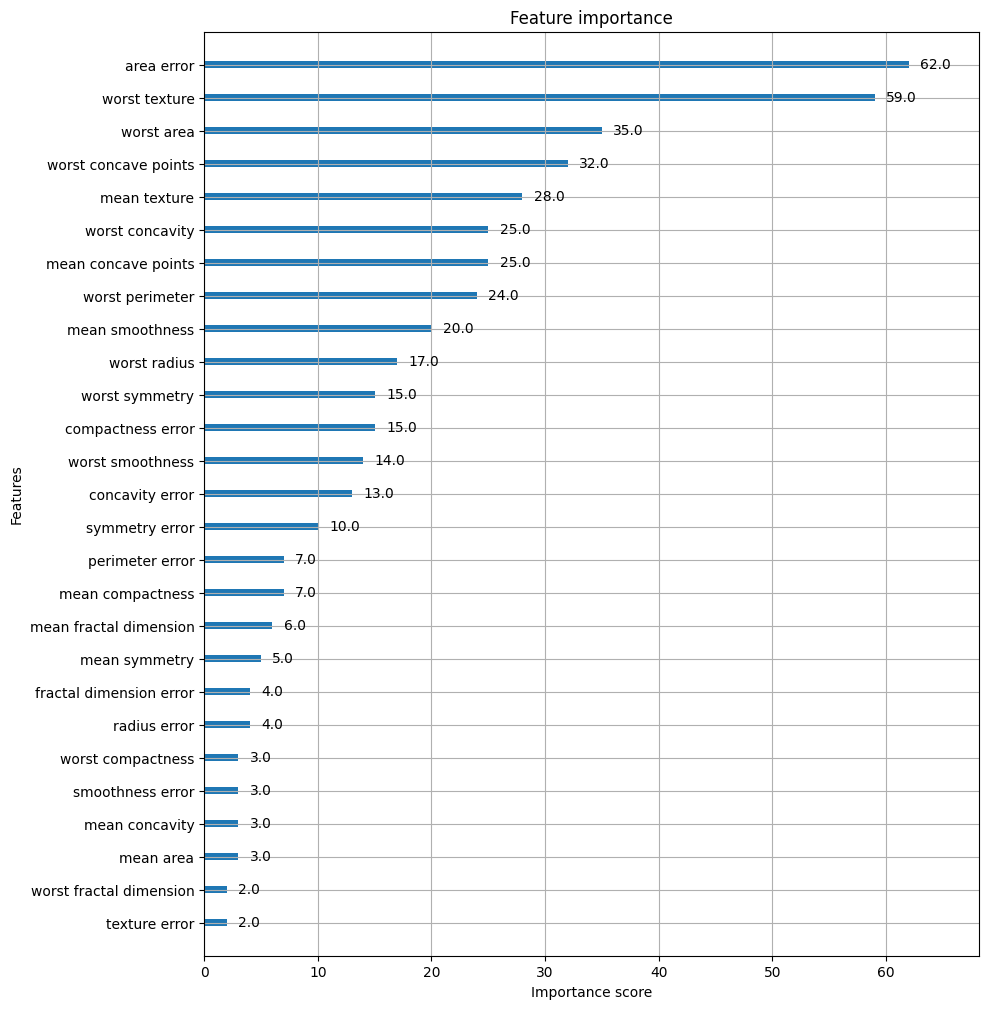

In [30]:
from xgboost import plot_importance
# plot_importance에 시각화하기 위해서는 DataFrame 형태로 데이터를 넣어준다.
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)
plt.show()

mean radius: 0.0000
mean texture: 0.0140
mean perimeter: 0.0000
mean area: 0.0000
mean smoothness: 0.0056
mean compactness: 0.0000
mean concavity: 0.0000
mean concave points: 0.0147
mean symmetry: 0.0000
mean fractal dimension: 0.0063
radius error: 0.0000
texture error: 0.0000
perimeter error: 0.0000
area error: 0.0245
smoothness error: 0.0000
compactness error: 0.0000
concavity error: 0.0000
concave points error: 0.0000
symmetry error: 0.0000
fractal dimension error: 0.0000
worst radius: 0.0196
worst texture: 0.0301
worst perimeter: 0.0224
worst area: 0.0245
worst smoothness: 0.0028
worst compactness: 0.0000
worst concavity: 0.0105
worst concave points: 0.0126
worst symmetry: 0.0000
worst fractal dimension: 0.0000


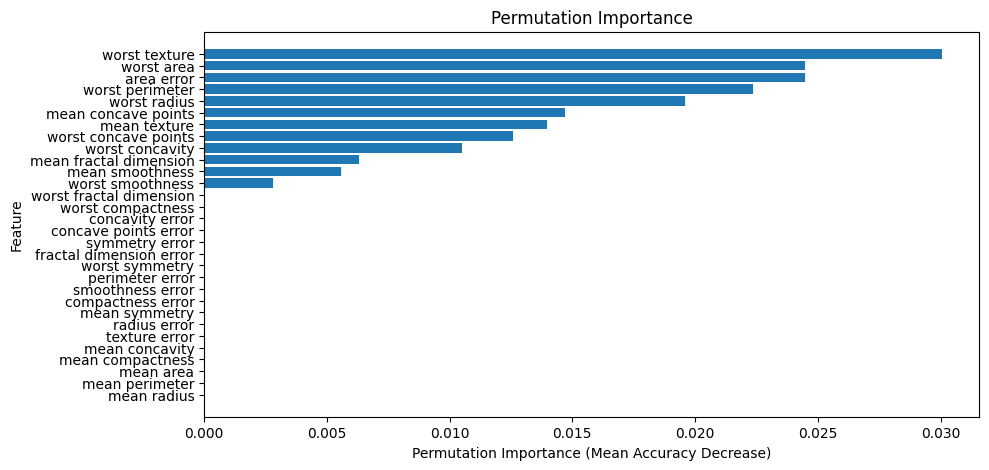

In [31]:
# permutation(퍼뮤테이션)은 순열이라고도 하며, 어떤 집합에서 원소들의 순서를 바꿔서 나열하는 경우를 의미합니다.
# 예를 들어, [1, 2, 3]이라는 집합이 있을 때, 이 원소들을 서로 다른 순서로 나열하는 모든 경우의 수를 permutation이라고 합니다.
# 머신러닝에서는 permutation을 활용하여, 예를 들어 'Permutation Importance'와 같이 각 feature의 중요도를 평가할 때 사용하기도 합니다.
# Permutation Importance를 사용하여 feature의 중요도를 평가하는 방법은 다음과 같습니다.
from sklearn.inspection import permutation_importance

# permutation_importance 함수는 모델, 데이터, 타겟, 반복 횟수 등을 인자로 받습니다.
perm_result = permutation_importance(
    xgb_clf, X_test, y_test, 
    scoring='accuracy', n_repeats=10, random_state=0
)

# 각 feature의 중요도(평균 감소 정도)를 출력합니다.
for i, col in enumerate(data.feature_names):
    print(f"{col}: {perm_result.importances_mean[i]:.4f}")

# 시각화
plt.figure(figsize=(10, 5))
sorted_idx = perm_result.importances_mean.argsort()
plt.barh(
    [data.feature_names[i] for i in sorted_idx], 
    perm_result.importances_mean[sorted_idx]
)
plt.xlabel("Permutation Importance (Mean Accuracy Decrease)")
plt.ylabel("Feature")
plt.title("Permutation Importance")
plt.show()
